# Homework 2 Report

### APARMENT PRICES ###
# Task 1: Calculate the price per square meter


In [9]:
import pandas as pd
data = pd.read_csv('Booli_sold.csv')

data['ppsqm'] = data['soldPrice'] / data['livingArea']
print(data.columns)

Index(['listPrice', 'rent', 'livingArea', 'rooms', 'published',
       'constructionYear', 'objectType', 'booliId', 'soldDate', 'soldPrice',
       'soldPriceSource', 'url', 'floor', 'additionalArea', 'apartmentNumber',
       'plotArea', 'location.address.streetAddress',
       'location.position.latitude', 'location.position.longitude',
       'location.position.isApproximate', 'location.region.municipalityName',
       'location.region.countyName', 'location.distance.ocean', 'source.name',
       'source.id', 'source.type', 'source.url', 'ppsqm'],
      dtype='object')


From the output above, we see that a new column named 'ppsqm' has been created 

# Task 2: Rank the top 5 most expensive apartments w.r.t ppsqm
Next task, rank the top 5 most expensive apartments w.r.t ppsqm using a sort_values function

In [6]:
top_5_expensive = data.sort_values(by='ppsqm', ascending=False).head(5)

print(top_5_expensive)

    listPrice    rent  livingArea  rooms            published  \
67    1595000  1464.0        24.0    1.0  2016-01-07 14:51:06   
50    1890000  1464.0        24.0    1.0  2016-06-11 08:55:51   
54    1795000  1374.0        23.0    1.0  2016-04-15 19:10:49   
34    1750000  1144.0        25.0    1.0  2017-05-18 16:20:57   
55    1895000  1522.0        26.9    1.0  2016-04-01 22:56:37   

    constructionYear objectType  booliId    soldDate  soldPrice  ...  \
67            1935.0   Lägenhet  2018259  2016-01-21    2500000  ...   
50            1935.0   Lägenhet  2125576  2016-06-21    2450000  ...   
54            1935.0   Lägenhet  2078171  2016-04-28    2300000  ...   
34            1936.0   Lägenhet  2330886  2017-06-01    2210000  ...   
55            1968.0   Lägenhet  2067384  2016-04-19    2300000  ...   

   location.position.longitude location.position.isApproximate  \
67                   18.055270                             NaN   
50                   18.055270              

This table is difficult to read due to all the rows. Lets just take out some of the information for the top 5 most expensive appartments w.r.t ppsqm.

In [8]:
print(top_5_expensive[['location.address.streetAddress','soldPrice', 'livingArea', 'ppsqm']])


   location.address.streetAddress  soldPrice  livingArea          ppsqm
67                  Ekhagsvägen 8    2500000        24.0  104166.666667
50                  Ekhagsvägen 8    2450000        24.0  102083.333333
54                 Ekhagsvägen 10    2300000        23.0  100000.000000
34                Torphagsvägen 4    2210000        25.0   88400.000000
55                Docentbacken 1B    2300000        26.9   85501.858736


# Task 3: What is the average ppsqm in the dataset?

In [10]:
average_ppsqm = data['ppsqm'].mean()

print(average_ppsqm)

58759.382760081724


Compared to highest ppsqm, this is almost half of that

# Task 4: Highlight an aspect of the data that you find interesting. Explain your choice.

My choice: the maximum rent for apartments. why? Good to know since you are most likely paying your loan and rent together each month

In [12]:
max_rent_index = data['rent'].idxmax()

max_rent_row = data.loc[max_rent_index]

print("Row with Maximum Rent:")
print(max_rent_row)

Row with Maximum Rent:
listPrice                                                       6450000
rent                                                             7962.0
livingArea                                                        138.0
rooms                                                               6.0
published                                           2015-12-31 02:44:25
constructionYear                                                 1935.0
objectType                                                     Lägenhet
booliId                                                         2011370
soldDate                                                     2016-01-14
soldPrice                                                       6450000
soldPriceSource                                                     bid
url                                 https://www.booli.se/annons/2011370
floor                                                               2.0
additionalArea                           

### THE SWEDISH ELECTION ###

# Task 1: Calculate the total number of legitimate votes

In [13]:
election_data = pd.read_csv('2018_R_per_kommun.csv', sep=';')

eligible_votes = election_data['RÖSTER GILTIGA'].sum()

print(eligible_votes)

6476725


# Task 2: Find the index of the maximum votes for 'S'

In [14]:
max_vote_index = election_data['S'].idxmax()

max_vote_kommunnamn = election_data.loc[max_vote_index, 'KOMMUNNAMN']

print("KOMMUNNAMN with Maximum Votes for 'S':", max_vote_kommunnamn)

KOMMUNNAMN with Maximum Votes for 'S': Danderyd


# Task 3: Rank the (3) municipalities with the highest participation (valdeltagande).

In [15]:
election_data['VALDELTAGANDE'] = pd.to_numeric(election_data['VALDELTAGANDE'], errors='coerce')

top_participation = election_data.sort_values(by='VALDELTAGANDE', ascending=False).head(3)[['KOMMUNNAMN', 'VALDELTAGANDE']]

print("Top 3 Municipalities with Highest Participation:")
print(top_participation)


Top 3 Municipalities with Highest Participation:
    KOMMUNNAMN  VALDELTAGANDE
187    Hammarö           91.0
18       Nacka           90.0
57      Gnosjö           86.0


### PREDICTING STROKES ###


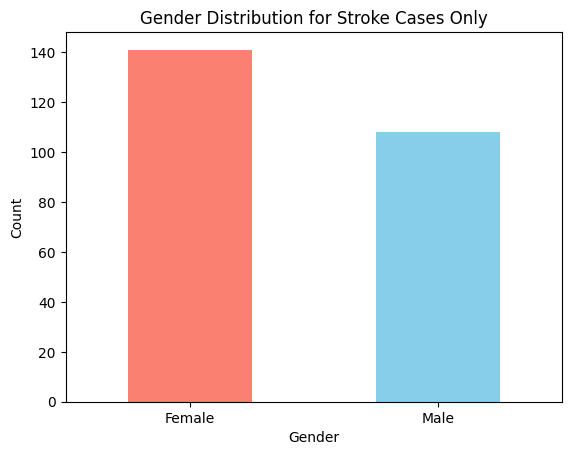

In [21]:


import matplotlib.pyplot as plt

# Load your data
data_stroke = pd.read_csv('stroke-data.csv')

# Filter data to include only stroke cases
stroke_only = data_stroke[data_stroke['stroke'] == 1]

# Group by 'Gender' and count occurrences
gender_counts_stroke = stroke_only['gender'].value_counts()

# Plotting the stacked bar chart for stroke cases only
gender_counts_stroke.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('Gender Distribution for Stroke Cases')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


From this simple graph we can see that females a